In [2]:
import pandas as pd
import numpy as np
import requests as req
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
api="http://api.nbp.pl/api/cenyzlota/2013-01-02/?format=json"
date=dt.datetime.today().date()

In [4]:
api=f"http://api.nbp.pl/api/cenyzlota/{date}/?format=json"
api

'http://api.nbp.pl/api/cenyzlota/2023-03-17/?format=json'

In [5]:
data=req.get(api).json()
price=data[0]["cena"]
price

273.54

In [6]:
req.get(api).json()[0]["cena"]

273.54

In [7]:
str(dt.datetime.today().date()-dt.timedelta(1))

'2023-03-16'

In [8]:
from json import JSONDecodeError
prices=[]
dates=[]
for i in range (0,150):
    api=f"http://api.nbp.pl/api/cenyzlota/{date}/?format=json"
    try:
        date=str(dt.datetime.today().date()-dt.timedelta(i))
        price=req.get(api).json()[0]["cena"]
        prices.append(price)
        dates.append(date)
    except JSONDecodeError as json:
        pass
    

In [15]:
df=pd.DataFrame(prices,dates,["gold_price_zl"])
df.sort_index(inplace=True)
df.iloc[103]

gold_price_zl    273.54
Name: 2023-03-17, dtype: float64

<AxesSubplot:title={'center':'Gold price in zlotych in last 150 days'}>

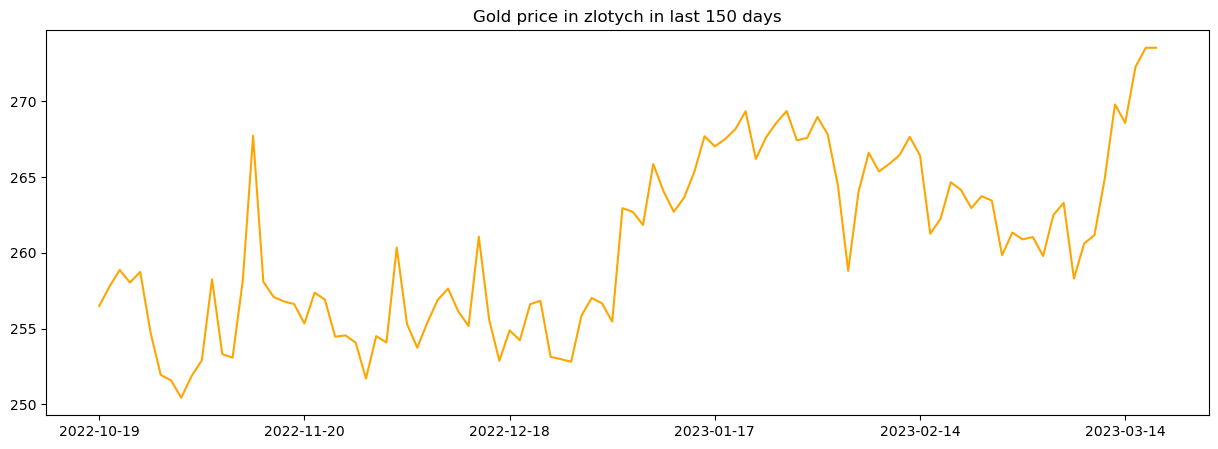

In [10]:
df.plot(y=["gold_price_zl"],figsize=(15,5),title="Gold price in zlotych in last 150 days",color='orange',legend=False)